In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

# K_MEANS

In [3]:
df = datasets.load_wine()
y = df.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
model  = KMeans(n_clusters=3)


In [5]:
model.fit(df.data)

KMeans(n_clusters=3)

In [12]:
labels= model.labels_
y = df.target

In [17]:
def cf_metrics(ds, labels, y):
    print(f'Homogeneity: {metrics.homogeneity_score(y,labels):.3f}')
    print(f'Completeness: {metrics.completeness_score(y,labels):.3f}')
    print(f'V-measure: {metrics.v_measure_score(y,labels):.3f}')
    print(f'Adjusted Rand Index: {metrics.adjusted_rand_score(y,labels):.3f}')
    print(f'Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y,labels):.3f}')
    print(f'Silhouette Coefficient: {metrics.silhouette_score(ds.data,labels):.3f}')

In [18]:

cf_metrics(df,labels, y)

Homogeneity: 0.429
Completeness: 0.429
V-measure: 0.429
Adjusted Rand Index: 0.371
Adjusted Mutual Information: 0.423
Silhouette Coefficient: 0.571


In [20]:
prediction = model.predict(df.data)
prediction

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

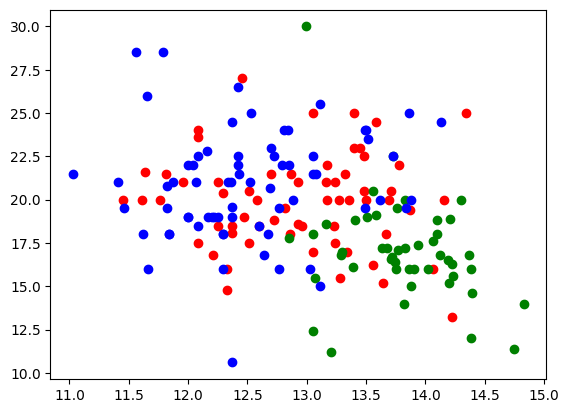

In [31]:
claster_0 = df.data[prediction ==0]
claster_1 = df.data[prediction ==1]
claster_2 = df.data[prediction ==2]
plt.scatter(claster_0[:,0], claster_0[0:,3], color = 'red')
plt.scatter(claster_1[:,0], claster_1[0:,3], color = 'green')
plt.scatter(claster_2[:,0], claster_2[0:,3], color = 'blue')

# DBSCAN

In [67]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [153]:
dbscan = DBSCAN(eps = 23, min_samples=4)


In [154]:
dbscan.fit(df.data)

DBSCAN(eps=23, min_samples=4)

In [155]:
pca = PCA(n_components=2).fit(df.data)
pca_2d = pca.transform(df.data)

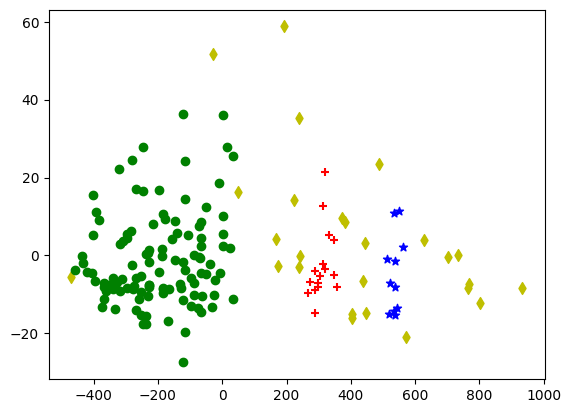

In [156]:
for i in range(0,pca_2d.shape[0]):
    if dbscan.labels_[i]==0:
        c1= plt.scatter(pca_2d[i, 0], pca_2d[i,1], c = 'r', marker='+')
    elif dbscan.labels_[i]==1:
        c1= plt.scatter(pca_2d[i, 0], pca_2d[i,1], c = 'g', marker='o')
    elif dbscan.labels_[i]==2:
        c1= plt.scatter(pca_2d[i, 0], pca_2d[i,1], c = 'b', marker='*')
    elif dbscan.labels_[i]== -1:
        c1= plt.scatter(pca_2d[i, 0], pca_2d[i,1], c = 'y', marker='d')

In [158]:
labels= dbscan.labels_
y = df.target

In [159]:
cf_metrics(df,labels, y)

Homogeneity: 0.397
Completeness: 0.378
V-measure: 0.387
Adjusted Rand Index: 0.290
Adjusted Mutual Information: 0.374
Silhouette Coefficient: 0.356


# Ієрархічна кластерізація

In [160]:
from scipy.cluster.hierarchy import linkage, dendrogram


In [161]:
mergining = linkage(df.data, method='complete')

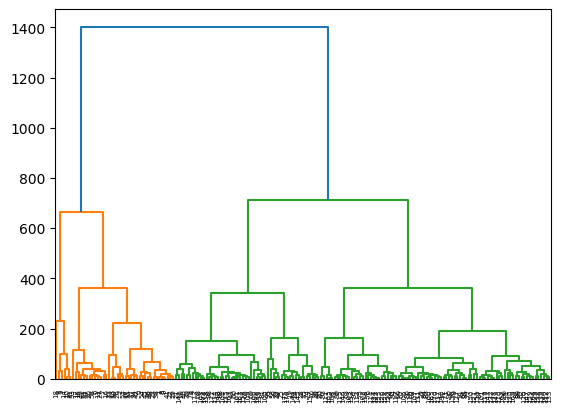

In [162]:
clusters = dendrogram(mergining, leaf_rotation=90)